In [1]:
# !pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [3]:
df1=pd.read_csv("../data/health/heart_attack_youngsters_india.csv")
df2=pd.read_csv("../data/health/Mental_Health_Lifestyle_Dataset.csv")
df3=pd.read_csv("../data/health/Test_Data.csv")
df4=pd.read_csv("../data/health/Train_Data.csv")

for i, df in enumerate([df1,df2,df3,df4], start=1):
    print(f"\nDataset {i}: shape={df.shape}")
    print(df.head())


Dataset 1: shape=(10000, 26)
   Age  Gender Region Urban/Rural     SES Smoking Status Alcohol Consumption  \
0   30    Male   East       Urban  Middle          Never           Regularly   
1   24  Female   East       Urban     Low   Occasionally        Occasionally   
2   24  Female  North       Urban     Low   Occasionally        Occasionally   
3   27    Male   East       Urban  Middle   Occasionally               Never   
4   21  Female   West       Rural     Low   Occasionally        Occasionally   

        Diet Type Physical Activity Level  Screen Time (hrs/day)  ...  \
0  Non-Vegetarian               Sedentary                      3  ...   
1  Non-Vegetarian               Sedentary                     15  ...   
2           Vegan                    High                     15  ...   
3      Vegetarian               Sedentary                      6  ...   
4      Vegetarian                Moderate                      4  ...   

   Stress Level Blood Pressure (systolic/diastolic

### Dataset 1

In [4]:
df1=pd.read_csv("../data/health/heart_attack_youngsters_india.csv")
print("Shape:", df1.shape)
print(df1.head())

Shape: (10000, 26)
   Age  Gender Region Urban/Rural     SES Smoking Status Alcohol Consumption  \
0   30    Male   East       Urban  Middle          Never           Regularly   
1   24  Female   East       Urban     Low   Occasionally        Occasionally   
2   24  Female  North       Urban     Low   Occasionally        Occasionally   
3   27    Male   East       Urban  Middle   Occasionally               Never   
4   21  Female   West       Rural     Low   Occasionally        Occasionally   

        Diet Type Physical Activity Level  Screen Time (hrs/day)  ...  \
0  Non-Vegetarian               Sedentary                      3  ...   
1  Non-Vegetarian               Sedentary                     15  ...   
2           Vegan                    High                     15  ...   
3      Vegetarian               Sedentary                      6  ...   
4      Vegetarian                Moderate                      4  ...   

   Stress Level Blood Pressure (systolic/diastolic mmHg)  \
0

In [5]:
print(df.columns.tolist())

['ID1', 'Specific ailments', 'ID2', 'Food preference', 'Age', 'BMI', 'Smoker?', 'Living in?', 'Any heriditary condition?', 'Follow Diet', 'Physical activity', 'Regular sleeping hours', 'Alcohol consumption', 'Social interaction', 'Taking supplements', 'Mental health management', 'Illness count last year', 'Healthy']


In [6]:
df.columns = df.columns.str.strip()

# Target
target_col = "Healthy"
y = df[target_col]
X = df.drop(columns=[target_col])

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Label Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Label Mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}


In [7]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['Food preference', 'Smoker?', 'Living in?', 'Any heriditary condition?']
Numerical columns: ['ID1', 'Specific ailments', 'ID2', 'Age', 'BMI', 'Follow Diet', 'Physical activity', 'Regular sleeping hours', 'Alcohol consumption', 'Social interaction', 'Taking supplements', 'Mental health management', 'Illness count last year']


In [8]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

In [9]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    ))
])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

pipeline.fit(X_train, y_train)

C:\Users\ASUS\OneDrive\Desktop\LifeAlly\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:41:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Accuracy: 0.8312114197530864

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76      1924
           1       0.85      0.89      0.87      3260

    accuracy                           0.83      5184
   macro avg       0.82      0.81      0.82      5184
weighted avg       0.83      0.83      0.83      5184



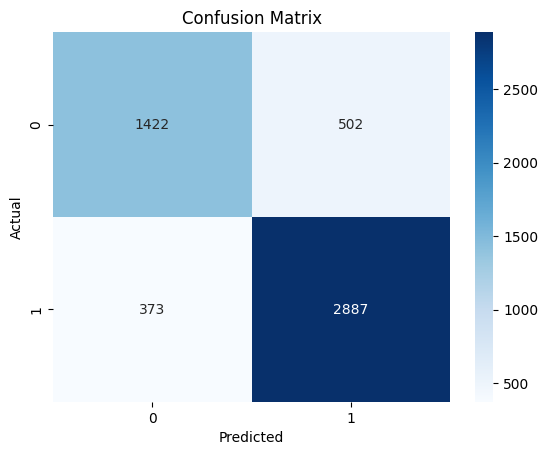

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=[str(c) for c in le.classes_]
))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(c) for c in le.classes_], yticklabels=[str(c) for c in le.classes_])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
import joblib
import os

os.makedirs("../models", exist_ok=True)

joblib.dump(pipeline, "../models/heart_health_xgb_model.pkl")
print("Saved pipeline as ../models/heart_health_xgb_model.pkl")

Saved pipeline as ../models/heart_health_xgb_model.pkl


### Dataset 2

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline

In [14]:
df2 = pd.read_csv("../data/health/Mental_Health_Lifestyle_Dataset.csv")
print("Shape:", df2.shape)
print(df2.head())
print(df2['Mental Health Condition'].unique())

Shape: (3000, 12)
     Country  Age  Gender Exercise Level   Diet Type  Sleep Hours  \
0     Brazil   48    Male            Low  Vegetarian          6.3   
1  Australia   31    Male       Moderate       Vegan          4.9   
2      Japan   37  Female            Low  Vegetarian          7.2   
3     Brazil   35    Male            Low       Vegan          7.2   
4    Germany   46    Male            Low    Balanced          7.3   

  Stress Level Mental Health Condition  Work Hours per Week  \
0          Low                     NaN                   21   
1          Low                    PTSD                   48   
2         High                     NaN                   43   
3          Low              Depression                   43   
4          Low                 Anxiety                   35   

   Screen Time per Day (Hours)  Social Interaction Score  Happiness Score  
0                          4.0                       7.8              6.5  
1                          5.2      

In [15]:
print(df.columns.tolist())

['ID1', 'Specific ailments', 'ID2', 'Food preference', 'Age', 'BMI', 'Smoker?', 'Living in?', 'Any heriditary condition?', 'Follow Diet', 'Physical activity', 'Regular sleeping hours', 'Alcohol consumption', 'Social interaction', 'Taking supplements', 'Mental health management', 'Illness count last year', 'Healthy']


In [16]:
df.columns = df.columns.str.strip()

X = df.drop("Healthy", axis=1)
y = df["Healthy"]

le = LabelEncoder()
y = le.fit_transform(y)

print("Classes:", le.classes_)

Classes: [0 1]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (20736, 17) Test size: (5184, 17)


In [18]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

In [19]:
class_counts = np.bincount(y_train)
total_samples = len(y_train)

class_weights = {i: total_samples / (len(class_counts) * count) 
                 for i, count in enumerate(class_counts)}

sample_weights = np.array([class_weights[label] for label in y_train])

print("Class counts:", class_counts)
print("Class weights:", class_weights)

Class counts: [ 7696 13040]
Class weights: {0: np.float64(1.3471933471933473), 1: np.float64(0.7950920245398773)}


In [20]:
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        random_state=42,
        eval_metric="mlogloss",
        use_label_encoder=False,
        max_depth=6,
        n_estimators=300,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8
    ))
])

In [21]:
pipeline.fit(X_train, y_train, classifier__sample_weight=sample_weights)
print("Model trained successfully ")

C:\Users\ASUS\OneDrive\Desktop\LifeAlly\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:41:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model trained successfully 


Accuracy: 0.8298611111111112

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      1924
           1       0.89      0.83      0.86      3260

    accuracy                           0.83      5184
   macro avg       0.82      0.83      0.82      5184
weighted avg       0.84      0.83      0.83      5184



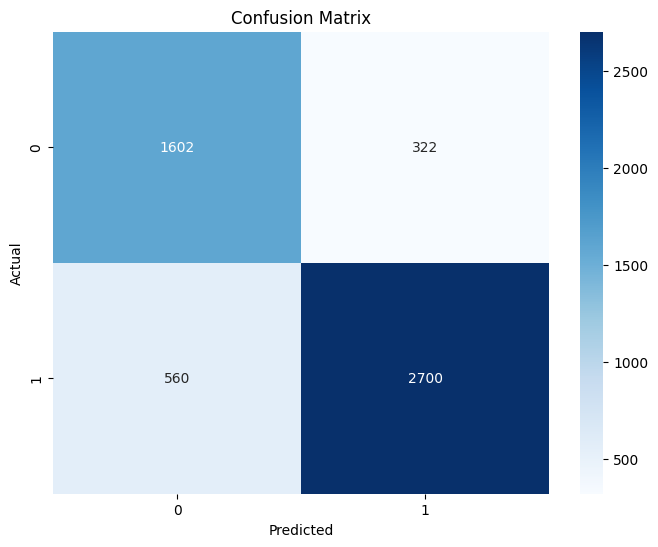

In [22]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", 
      classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(c) for c in le.classes_], 
            yticklabels=[str(c) for c in le.classes_])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [23]:
import joblib
import os

os.makedirs("../models", exist_ok=True)

joblib.dump(pipeline, "../models/mental_health_model.pkl")
print("Saved pipeline as ../models/mental_health_model.pkl")

Saved pipeline as ../models/mental_health_model.pkl


### Dataset 3 & 4

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [25]:
df4=pd.read_csv("../data/health/Train_Data.csv")
df3=pd.read_csv("../data/health/Test_Data.csv")

print("Train dataset shape:", df4.shape)
print("Test dataset shape:", df3.shape)

Train dataset shape: (25920, 18)
Test dataset shape: (6480, 17)


In [26]:
df4=df4.drop(columns=["ID1", "ID2"])
df3=df3.drop(columns=["ID1", "ID2"])

In [27]:
X=df4.drop("Healthy", axis=1)
y=df4["Healthy"]

In [28]:
le=LabelEncoder()

for col in X.select_dtypes(include=["object"]).columns:
    X[col]=le.fit_transform(X[col])

for col in df3.select_dtypes(include=["object"]).columns:
    df3[col]=le.fit_transform(df3[col])

In [30]:
X_train, X_val, y_train, y_val= train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [33]:
from sklearn.impute import SimpleImputer

pipeline=Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(class_weight="balanced", max_iter=1000))
])
pipeline.fit(X_train, y_train)

,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


Validation Accuracy: 0.8298611111111112

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      1924
           1       0.89      0.83      0.86      3260

    accuracy                           0.83      5184
   macro avg       0.82      0.83      0.82      5184
weighted avg       0.84      0.83      0.83      5184



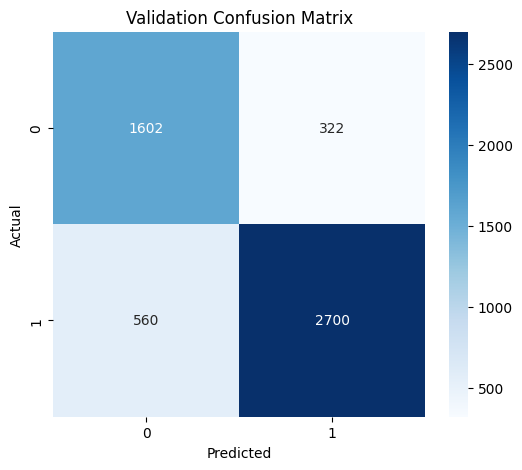

In [34]:
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

cm=confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Validation Confusion Matrix")
plt.show()

In [35]:
pipeline.fit(X, y)

,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [36]:
os.makedirs("../models", exist_ok=True)
joblib.dump(pipeline, "../models/mental_health_model.pkl")
print("Saved pipeline as ../models/mental_health_model.pkl")

Saved pipeline as ../models/mental_health_model.pkl


In [37]:
test_preds=pipeline.predict(df3)

output=pd.DataFrame({
    "Prediction": test_preds
})
output.to_csv("healthy_predictions.csv", index=False)

print("Predictions saved to health_predictions.csv")

Predictions saved to health_predictions.csv
